# <center>Introduction and Sentiment Analysis</center>
---

> **`I just want to drive the car, I don't care how it works.`**

## Introduction

Transformers are a type of neural network that can process sequential data, such as text, speech, or images, without relying on recurrent or convolutional layers. Instead, they use a mechanism called **attention** to learn the relationships between different elements in the input and output sequences. Attention allows the model to focus on the most relevant parts of the input for each element of the output, and to encode the context and position of each element in the sequence.

Transformers consist of two main components: an **encoder** and a **decoder**. The encoder takes the input sequence and transforms it into a high-dimensional representation, called the **hidden state**. The decoder takes the hidden state and generates the output sequence, one element at a time. Both the encoder and the decoder are composed of multiple identical layers, each containing two sub-layers: a **multi-head attention** layer and a **feed-forward** layer. The multi-head attention layer allows the model to attend to different parts of the sequence simultaneously, using multiple attention heads. The feed-forward layer applies a non-linear transformation to the output of the attention layer.

Transformers have been shown to achieve state-of-the-art results in various natural language processing tasks, such as machine translation, text summarization, question answering, and natural language generation. Some of the most famous Transformer models are **BERT**, **GPT-2**, and **GPT-3**. BERT is a bidirectional encoder that can learn from both left and right context, and can be fine-tuned for various downstream tasks. GPT-2 and GPT-3 are large-scale generative models that can produce coherent and diverse text on various topics, given a prompt or a context.

### Transformer's main points
1. The **attention mechanism** helps the Neural Network to learn from sequences that are very long.
    * They can learn from longer sequences than LSTM, which is another type of RNNs.
    * Attention was made for LSTM, but Transformers use only attention, and do not use LSTM at all.
2. Transformers are big and slow
    * But computations can be done in parallel (unlike RNNs).

There isn't just one type of transformer, there are many:
* BERT
* GPT

> Transformers can be applied to anything.

## Contents

* Sentiment Analysis
* Embeddings and nearest neighbour search
* Named Entity Recognition (many to many)
* Text generation
* Masked Language Model
* Text summarization (sequence to sequence)
* Language translation (used for building intuition for Attention)
* Question Answering
* Zero-Shot classification

## How we get from RNNs to Transformers?

RNNs and Transformers are two different types of neural networks that can handle sequential data, such as text, speech, or images. However, they have different ways of processing and learning from the data.

**RNNs** are sequential models that process data one element at a time, maintaining an internal hidden state that is updated at each step. They operate in a recurrent manner, where the output at each step depends on the previous hidden state and the current input. This allows them to capture the temporal dependencies and context in the data. However, RNNs have some limitations, such as:
- They are slow to train, as they cannot be parallelized due to their sequential nature.
- They suffer from the vanishing or exploding gradient problem, where the influence of earlier inputs diminishes or grows exponentially as the sequence progresses, making it difficult to capture long-term dependencies.
- They have a fixed-length representation of the input sequence, which may lose some information or introduce noise.

**Transformers** are non-sequential models that process data in parallel, using a mechanism called attention to learn the relationships between different elements in the input and output sequences. They do not rely on recurrent or convolutional layers, but instead use multiple layers of self-attention and cross-attention to encode and decode the data. This allows them to capture the global dependencies and context in the data. Some of the advantages of Transformers are:
- They are fast to train, as they can be parallelized and distributed across multiple devices.
- They do not suffer from the vanishing or exploding gradient problem, as they do not have recurrent connections or backpropagation through time.
- They have a variable-length representation of the input sequence, which can preserve more information and reduce noise.

## Sentiment Analysis (Classification)

**Sentiment analysis** is a NLP technique that detects and extracts the subjective information in a text, such as the author's attitude, opinion, emotion, or sentiment. Some applications of Sentiment analysis are:

- **Reputation management**: Monitoring social media platforms and analyzing the feedback and opinions of customers on products, services, or brands.

- **Competitive intelligence**: Comparing the sentiment of a business and its competitors, and identifying their strengths, weaknesses, opportunities, and threats.

- **Customer support**: Determining the best response based on the customer's sentiment, and providing personalized and empathetic solutions.

- **Stock trading**: Reading news articles/tweets that might affect the stock prices of companies, and using sentiment to decide whether to buy or sell.

### Why use Transformers instead of Bag of Words (BOW) model.

- Transformers can capture the **meaning and context** of the text, while bag of words only counts the **frequency** of the words.
- Transformers can handle **long and complex** sequences of words, while bag of words suffers from the **sparsity and dimensionality** problems.
- Transformers can learn from **pretrained language models**, while bag of words requires **manual feature engineering** or **domain knowledge**.
- Transformers can perform **self-attention** and **cross-attention**, while bag of words ignores the **order and position** of the words.

### Hugging Face Pipeline

Hugging Face **pipeline** is a simple and powerful way to use pre-trained models for various natural language processing tasks, such as text classification, sentiment analysis, question answering, and more.

- It is a **wrapper** around the Hugging Face Transformers library, which provides a large collection of state-of-the-art models for natural language understanding and generation.

- It offers a simple and unified API that **abstracts** away the complex code and logic behind the models, and allows users to focus on the input and output of the task.

- It supports **multiple tasks**, such as named entity recognition, masked language modeling, sentiment analysis, feature extraction, and question answering. Each task has a dedicated pipeline class that inherits from the base pipeline class.

- It allows users to **easily load and use** any model from the Hugging Face Hub, which is a platform that hosts thousands of models from the community and the Hugging Face team.

- It provides various options and parameters to customize the pipeline behavior, such as the device (CPU or GPU), the batch size, the return type (dict or list), the top-k results, the aggregation strategy, and more..

#### Workflow
* **Import** the pipeline
* **Load** a pretrained model
* **Use** the pre-trained model (simply pass the string/list of strings)

In [9]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 117.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.0 MB/s eta 0:00:00


In [10]:
from transformers import pipeline

# Create your pipeline (includes tokenization, etc...)
classifier = pipeline(
    task = "sentiment-analysis",
    model = "distilbert-base-uncased-finetuned-sst-2-english"
)

# No need to convert inputs into PyTorch Tensors, Numpy array, Tensorflow Tensor, etc.
# We can simply pass the raw text to the model without any preprocessing.

# Output is a dictionary
print(classifier("This is such a great movie. It can be watched more than once."))  # passing single input
print(classifier("This is not a great movie. It can't be watched more than once.")) # passing single input

print(classifier(
    [
        "This is such a great movie. It can be watched more than once.",
        "This is not a great movie. It can't be watched more than once."
    ]
)) # passing list of inputs

(…)d-sst-2-english/resolve/main/config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

(…)glish/resolve/main/tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

(…)ned-sst-2-english/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998340606689453}]
[{'label': 'NEGATIVE', 'score': 0.9995469450950623}]
[{'label': 'POSITIVE', 'score': 0.9998340606689453}, {'label': 'NEGATIVE', 'score': 0.9995469450950623}]


## Sentiment Analysis in Python

In [11]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline

import sklearn.model_selection as model_selection
import sklearn.metrics as metrics

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [13]:
# hugging face pipeline
classifier = pipeline(
    task = "sentiment-analysis",
    model = "distilbert-base-uncased-finetuned-sst-2-english",
    device = device
)

print(type(classifier))

<class 'transformers.pipelines.text_classification.TextClassificationPipeline'>


In [18]:
df = pd.read_csv("Tweets.csv")

print(df.shape)
df.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [19]:
# We need only two features "text" and "airline_sentiment"
data = df[["text", "airline_sentiment"]]
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


Text(0.5, 1.0, 'airline_sentiment')

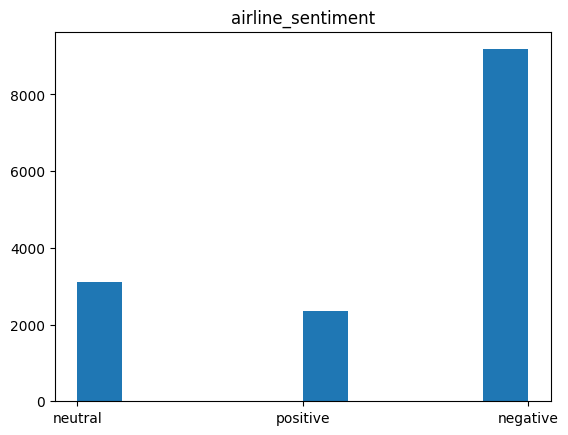

In [20]:
# target feature distribution
data["airline_sentiment"].hist(grid = False)
plt.title("airline_sentiment")

* The target feature is **imbalanced**.
* Our pretrained model only classifies **positive** and **negative**, hence we need to remove all those **neutral** samples.

(11541, 2)


Text(0.5, 1.0, 'airline_sentiment')

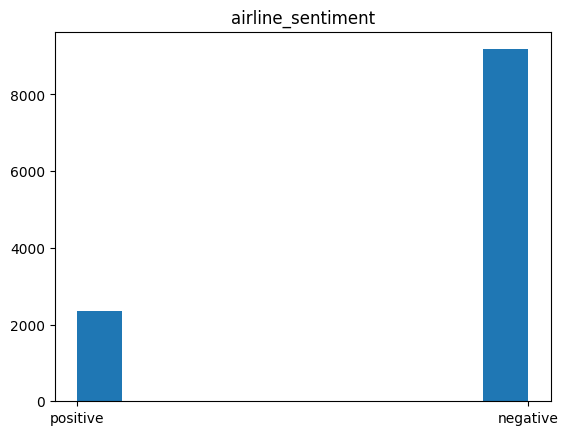

In [21]:
data = data[data["airline_sentiment"] != "neutral"]

print(data.shape)
data["airline_sentiment"].hist(grid = False)
plt.title("airline_sentiment")

Text(0.5, 1.0, 'target')

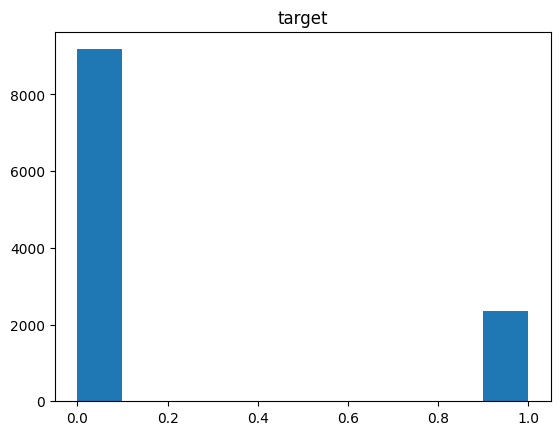

In [22]:
# Create new feature "target" containing values 0 & 1
data["target"] = data["airline_sentiment"].map({
    "negative" : 0,
    "positive" : 1
})

data["target"].hist(grid = False)
plt.title("target")

In [23]:
print(data.shape)
data.head()

(11541, 3)


,text,airline_sentiment,target
1,@VirginAmerica plus you've added commercials t...,positive,1
3,@VirginAmerica it's really aggressive to blast...,negative,0
4,@VirginAmerica and it's a really big bad thing...,negative,0
5,@VirginAmerica seriously would pay $30 a fligh...,negative,0
6,"@VirginAmerica yes, nearly every time I fly VX...",positive,1


In [24]:
# List of strings as input
texts = data["text"].to_list()

# Prediction
predictions = classifier(texts)
predictions

[{'label': 'POSITIVE', 'score': 0.6070823669433594},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553212523460388},
 {'label': 'POSITIVE', 'score': 0.9827088117599487},
 {'label': 'POSITIVE', 'score': 0.9994851350784302},
 {'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957},
 {'label': 'POSITIVE', 'score': 0.9996304512023926},
 {'label': 'NEGATIVE', 'score': 0.9980512857437134},
 {'label': 'POSITIVE', 'score': 0.9964436888694763},
 {'label': 'NEGATIVE', 'score': 0.9968666434288025},
 {'label': 'POSITIVE', 'score': 0.9787647724151611},
 {'label': 'POSITIVE', 'score': 0.9995218515396118},
 {'label': 'NEGATIVE', 'score': 0.9954516291618347},
 {'label': 'POSITIVE', 'score': 0.9995624423027039},
 {'label': 'POSITIVE', 'score': 0.999874830245

In [25]:
# To calculate AUC score we need probabilities of the same kind, which we don't have, hence this step
probabilities = [
    pred["score"] if pred["label"].startswith("P") else (1 - pred["score"]) for pred in predictions
  ]

print(probabilities)

[0.6070823669433594, 0.0026550889015197754, 0.0004176497459411621, 0.014574944972991943, 0.9553212523460388, 0.9827088117599487, 0.9994851350784302, 0.9993509650230408, 0.9940821528434753, 0.9863133430480957, 0.9996304512023926, 0.001948714256286621, 0.9964436888694763, 0.0031333565711975098, 0.9787647724151611, 0.9995218515396118, 0.004548370838165283, 0.9995624423027039, 0.9998748302459717, 0.004880666732788086, 0.00040477514266967773, 0.0006322264671325684, 0.015428304672241211, 0.01828092336654663, 0.0004482865333557129, 0.0023748278617858887, 0.9934480786323547, 0.9976067543029785, 0.8661723136901855, 0.0003237724304199219, 0.8415611386299133, 0.0032317638397216797, 0.9997846484184265, 0.17614370584487915, 0.9993895292282104, 0.09156644344329834, 0.004861712455749512, 0.9997820258140564, 0.0014235973358154297, 0.004673957824707031, 0.00464242696762085, 0.019041001796722412, 0.991169810295105, 0.0125504732131958, 0.00809931755065918, 0.9994875192642212, 0.9327114224433899, 0.039257

In [26]:
# Converting the predictions into an array, which will help in calculating the accuracy easily
predictions_as_array = [
    1 if pred["label"].startswith("P") else 0 for pred in predictions
  ]

print(predictions_as_array)

[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 

In [27]:
# Convert it into numpy array
predictions_as_array = np.array(predictions_as_array)

In [28]:
accuracy = np.mean(data["target"] == predictions_as_array)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8899


**Accuracy** is **88.9 %**, it's a good score then? Well yes and no, as the data is **imbalanced** so accuracy can be misleading.

In [32]:
# Confusion matrix
cm = metrics.confusion_matrix(
    y_true = data["target"],
    y_pred = predictions_as_array,
    normalize = "true"
)

print(cm)

[[0.90117673 0.09882327]
 [0.15404147 0.84595853]]


<Axes: >

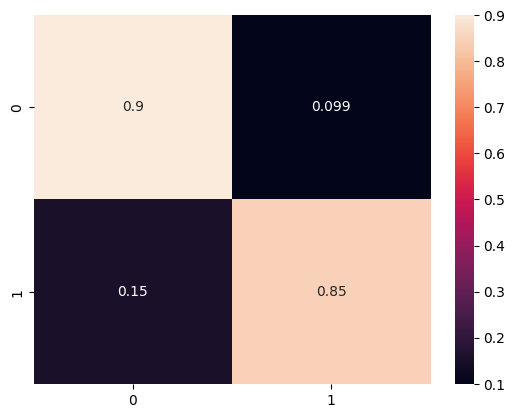

In [39]:
# Visualize Confusion Matrix
sns.heatmap(
    data = cm,
    annot = True
  )

In [41]:
f1_score = metrics.f1_score(
    y_true = data["target"],
    y_pred = predictions_as_array
)

print(f"F1- Score: {f1_score:.4f}")

F1- Score: 0.7588


In [43]:
roc_auc_score = metrics.roc_auc_score(
    y_true = data["target"],
    y_score = probabilities
)

print(f"ROC-AUC Score: {roc_auc_score:.4f}")

ROC-AUC Score: 0.9486
